#Exploratory Data Analysis on Hollywood Theatrical Market Synopsis 1995 to 2021
Dataset from: https://www.kaggle.com/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021

In [815]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Annual Ticket Sales

In [816]:
salesdf = pd.read_csv("archive\AnnualTicketSales.csv")
salesdf.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [817]:
salesdf.drop(columns=['Unnamed: 5'],inplace=True)

In [818]:
salesdf['TICKETS SOLD'] = salesdf['TICKETS SOLD'].str.replace(',', '')
salesdf['TOTAL BOX OFFICE'] = salesdf['TOTAL BOX OFFICE'].str.replace(',', '')
salesdf['TOTAL BOX OFFICE'] = salesdf['TOTAL BOX OFFICE'].str.replace('$', '')
salesdf['TOTAL INFLATION ADJUSTED BOX OFFICE'] = salesdf['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',', '')
salesdf['TOTAL INFLATION ADJUSTED BOX OFFICE'] = salesdf['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$', '')
salesdf['AVERAGE TICKET PRICE'] = salesdf['AVERAGE TICKET PRICE'].str.replace('$', '')
salesdf.head()

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


In [819]:
salesdf.isnull().sum()

YEAR                                   0
TICKETS SOLD                           0
TOTAL BOX OFFICE                       0
TOTAL INFLATION ADJUSTED BOX OFFICE    0
AVERAGE TICKET PRICE                   0
dtype: int64

In [820]:
salesdf.dtypes

YEAR                                    int64
TICKETS SOLD                           object
TOTAL BOX OFFICE                       object
TOTAL INFLATION ADJUSTED BOX OFFICE    object
AVERAGE TICKET PRICE                   object
dtype: object

In [821]:
salesdf = salesdf.astype('float')
salesdf.dtypes

YEAR                                   float64
TICKETS SOLD                           float64
TOTAL BOX OFFICE                       float64
TOTAL INFLATION ADJUSTED BOX OFFICE    float64
AVERAGE TICKET PRICE                   float64
dtype: object

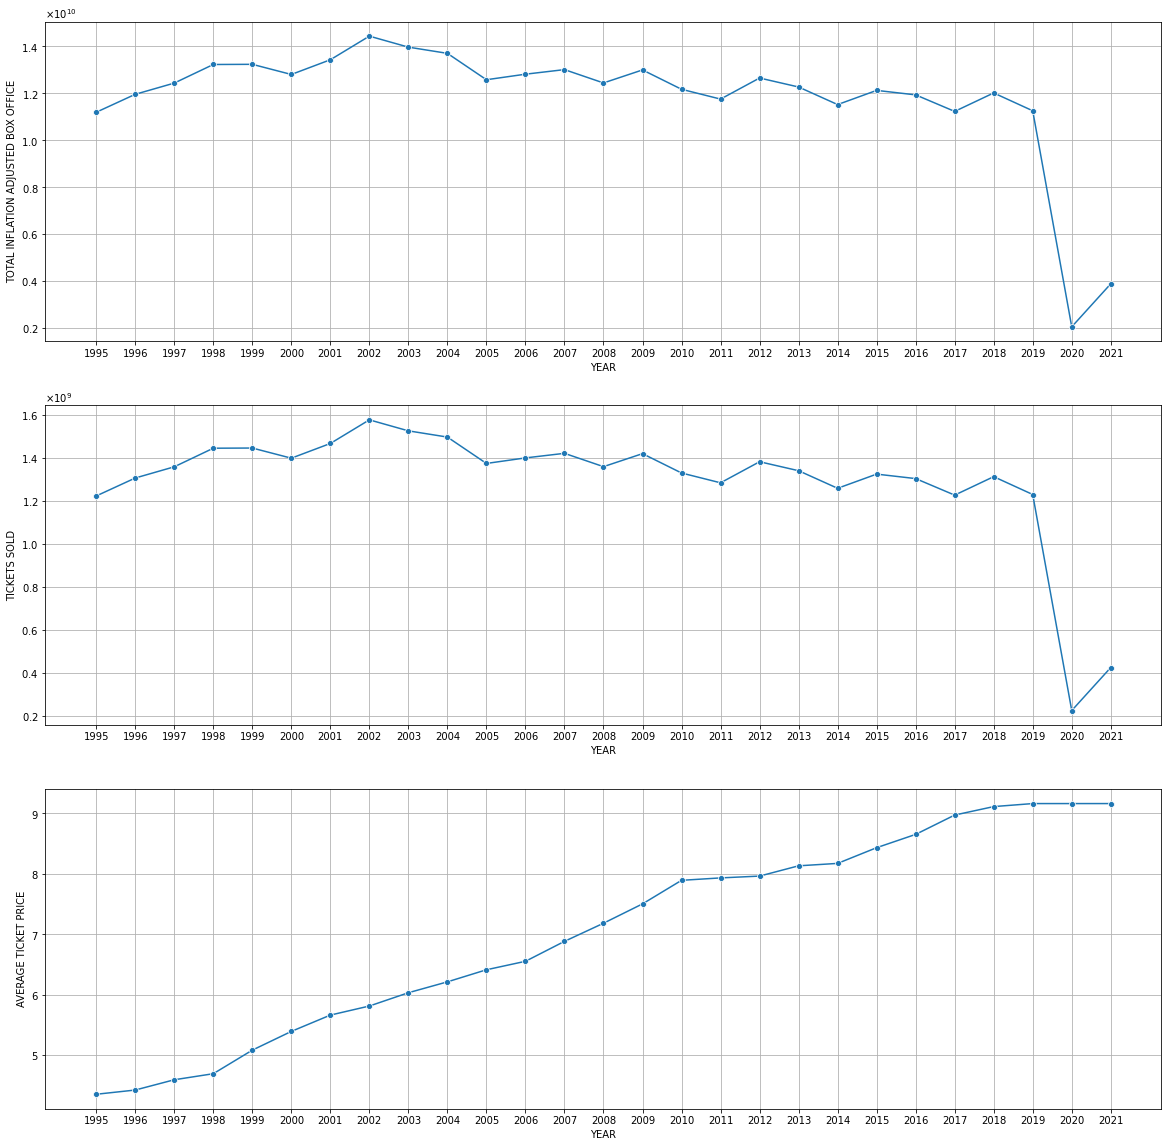

In [822]:
fig,axs = plt.subplots(3,1,figsize=(20,20))
sb.lineplot(x='YEAR',y='TOTAL INFLATION ADJUSTED BOX OFFICE',data=salesdf,marker="o",ax=axs[0])
axs[0].ticklabel_format(style='sci',useMathText=True,axis='y')
axs[0].set_xticks(np.arange(1995, 2022, 1))
axs[0].grid()
sb.lineplot(x='YEAR',y='TICKETS SOLD',data=salesdf,marker="o",ax=axs[1])
axs[1].ticklabel_format(style='sci',useMathText=True,axis='y')
axs[1].set_xticks(np.arange(1995, 2022, 1))
axs[1].grid()
sb.lineplot(x='YEAR',y='AVERAGE TICKET PRICE',data=salesdf,marker="o",ax=axs[2])
axs[2].ticklabel_format(style='sci',useMathText=True,axis='y')
axs[2].set_xticks(np.arange(1995, 2022, 1))
axs[2].grid()

#Highest Grossers

In [823]:
topmoviedf = pd.read_csv('archive\HighestGrossers.csv')
topmoviedf.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [824]:
topmoviedf['TICKETS SOLD'] = topmoviedf['TICKETS SOLD'].str.replace(',', '')
topmoviedf['TOTAL FOR YEAR'] = topmoviedf['TOTAL FOR YEAR'].str.replace(',', '')
topmoviedf['TOTAL FOR YEAR'] = topmoviedf['TOTAL FOR YEAR'].str.replace('$', '')
topmoviedf['TOTAL IN 2019 DOLLARS'] = topmoviedf['TOTAL IN 2019 DOLLARS'].str.replace(',', '')
topmoviedf['TOTAL IN 2019 DOLLARS'] = topmoviedf['TOTAL IN 2019 DOLLARS'].str.replace('$', '')
topmoviedf.head()

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942


In [825]:
topmoviedf.isnull().sum()

YEAR                     0
MOVIE                    0
GENRE                    3
MPAA RATING              0
DISTRIBUTOR              0
TOTAL FOR YEAR           0
TOTAL IN 2019 DOLLARS    0
TICKETS SOLD             0
dtype: int64

In [826]:
topmoviedf[topmoviedf['GENRE'].isnull()]

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
24,2019,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000,858373002,93708843
25,2020,Bad Boys For Life,NaN,R,Sony Pictures,204417855,204417848,22316359
26,2021,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704,224226704,24478897


In [827]:
topmoviedf['GENRE'].unique()

array(['Drama', 'Adventure', 'Action', nan], dtype=object)

In [828]:
topmoviedf.loc[24,'GENRE'] = 'Action'
topmoviedf.loc[25,'GENRE'] = 'Action'
topmoviedf.loc[26,'GENRE'] = 'Action'
topmoviedf.isnull().sum()

YEAR                     0
MOVIE                    0
GENRE                    0
MPAA RATING              0
DISTRIBUTOR              0
TOTAL FOR YEAR           0
TOTAL IN 2019 DOLLARS    0
TICKETS SOLD             0
dtype: int64

In [829]:
topmoviedf.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR           object
TOTAL IN 2019 DOLLARS    object
TICKETS SOLD             object
dtype: object

In [830]:
topmoviedf[['YEAR','TICKETS SOLD','TOTAL FOR YEAR','TOTAL IN 2019 DOLLARS']] = topmoviedf[['YEAR','TICKETS SOLD','TOTAL FOR YEAR','TOTAL IN 2019 DOLLARS']].astype('float')
topmoviedf.dtypes

YEAR                     float64
MOVIE                     object
GENRE                     object
MPAA RATING               object
DISTRIBUTOR               object
TOTAL FOR YEAR           float64
TOTAL IN 2019 DOLLARS    float64
TICKETS SOLD             float64
dtype: object

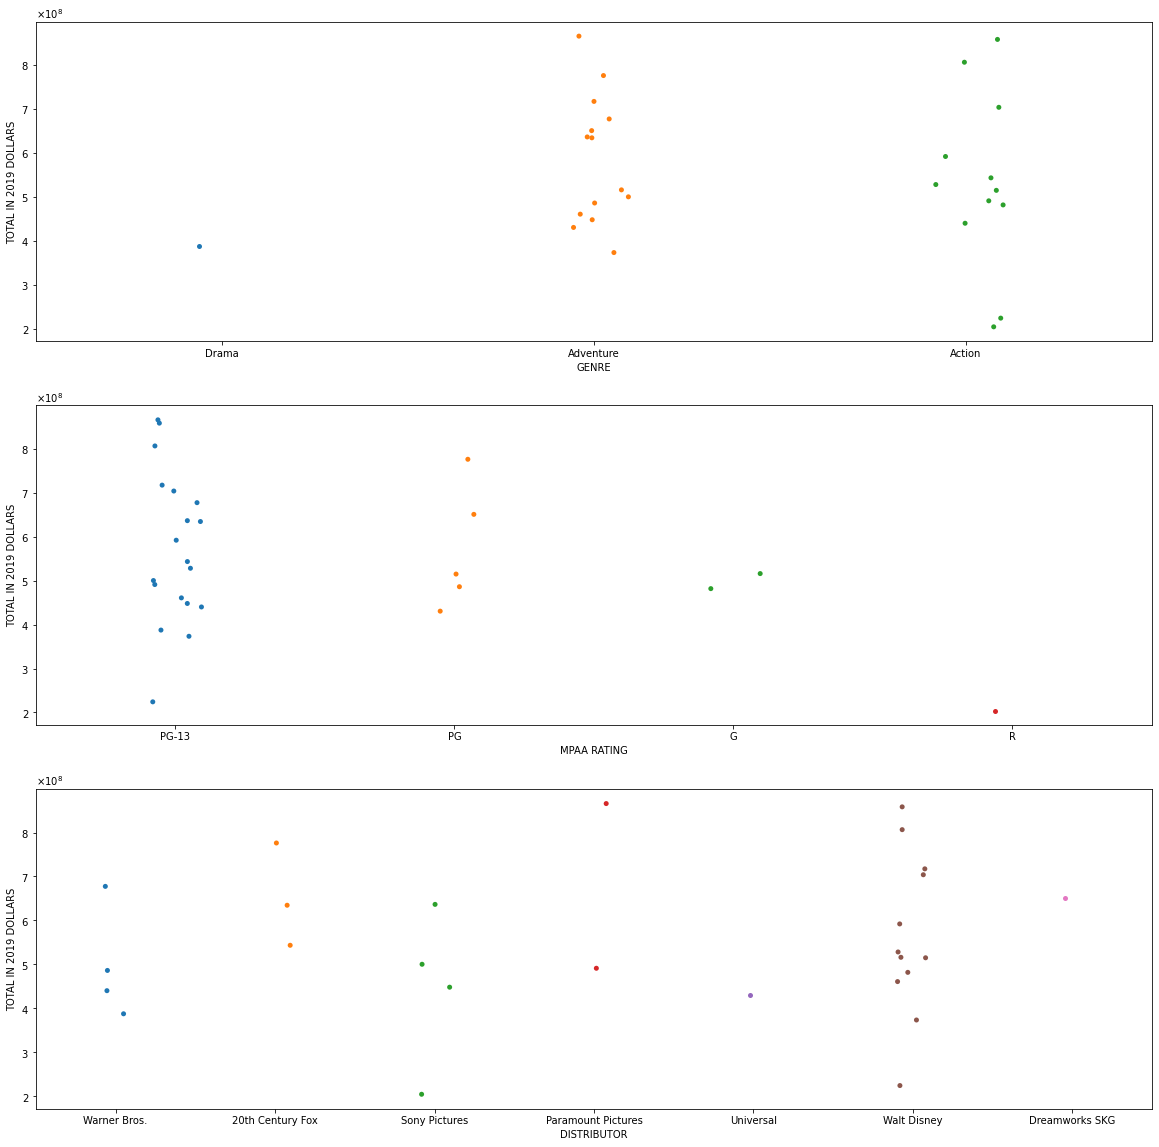

In [831]:
fig,axs = plt.subplots(3,1,figsize=(20,20))
sb.stripplot(x='GENRE',y='TOTAL IN 2019 DOLLARS',data=topmoviedf,ax=axs[0])
axs[0].ticklabel_format(style='sci',useMathText=True,axis='y')
sb.stripplot(x='MPAA RATING',y='TOTAL IN 2019 DOLLARS',data=topmoviedf,ax=axs[1])
axs[1].ticklabel_format(style='sci',useMathText=True,axis='y')
sb.stripplot(x='DISTRIBUTOR',y='TOTAL IN 2019 DOLLARS',data=topmoviedf,ax=axs[2])
axs[2].ticklabel_format(style='sci',useMathText=True,axis='y')

#Popular Creative Types

In [832]:
typesdf = pd.read_csv('archive\PopularCreativeTypes.csv')
typesdf.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%


In [833]:
typesdf['MOVIES'] = typesdf['MOVIES'].str.replace(',', '')
typesdf['TOTAL GROSS'] = typesdf['TOTAL GROSS'].str.replace(',', '')
typesdf['TOTAL GROSS'] = typesdf['TOTAL GROSS'].str.replace('$', '')
typesdf['AVERAGE GROSS'] = typesdf['AVERAGE GROSS'].str.replace(',', '')
typesdf['AVERAGE GROSS'] = typesdf['AVERAGE GROSS'].str.replace('$', '')
typesdf['MARKET SHARE'] = typesdf['MARKET SHARE'].str.replace('%', '')
typesdf.head()

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442,96203727036,12927133,40.46
1,2.0,Kids Fiction,564,32035539746,56800602,13.47
2,3.0,Science Fiction,724,29922660857,41329642,12.59
3,4.0,Fantasy,759,21724062575,28621953,9.14
4,5.0,Super Hero,129,20273157911,157156263,8.53


In [834]:
typesdf.isnull().sum()

RANK              1
CREATIVE TYPES    1
MOVIES            1
TOTAL GROSS       1
AVERAGE GROSS     1
MARKET SHARE      1
dtype: int64

In [835]:
typesdf[typesdf['RANK'].isnull()]

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
9,NaN,NaN,NaN,NaN,NaN,NaN


In [836]:
typesdf.drop(index=9,inplace=True)
typesdf.isnull().sum()

RANK              0
CREATIVE TYPES    0
MOVIES            0
TOTAL GROSS       0
AVERAGE GROSS     0
MARKET SHARE      0
dtype: int64

In [837]:
typesdf.dtypes

RANK              float64
CREATIVE TYPES     object
MOVIES             object
TOTAL GROSS        object
AVERAGE GROSS      object
MARKET SHARE       object
dtype: object

In [838]:
typesdf[['MOVIES','TOTAL GROSS','AVERAGE GROSS','MARKET SHARE']] = typesdf[['MOVIES','TOTAL GROSS','AVERAGE GROSS','MARKET SHARE']].astype('float')
typesdf.dtypes

RANK              float64
CREATIVE TYPES     object
MOVIES            float64
TOTAL GROSS       float64
AVERAGE GROSS     float64
MARKET SHARE      float64
dtype: object

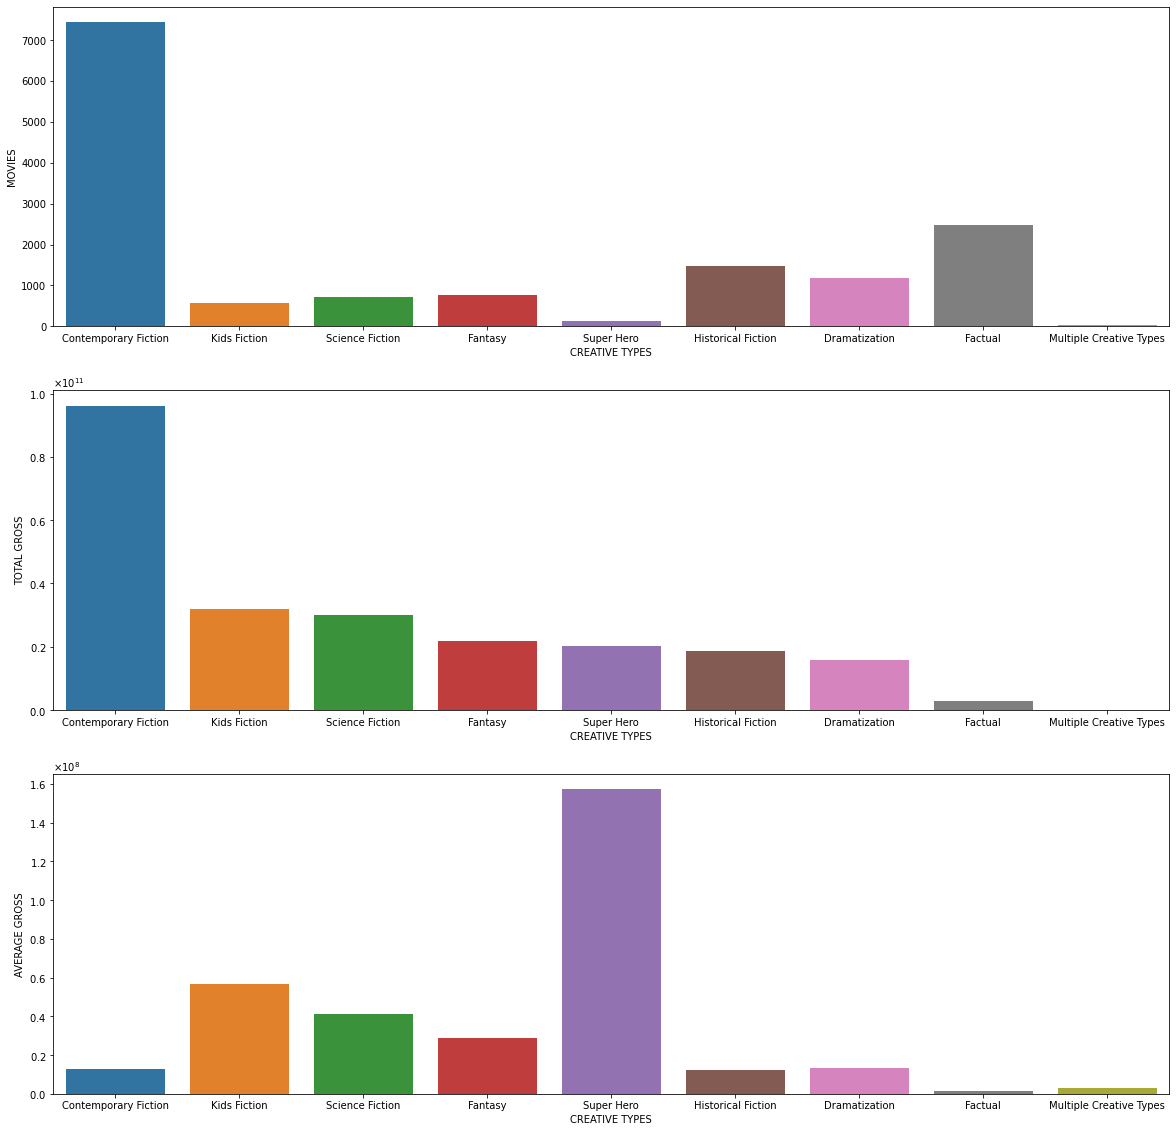

In [839]:
fig,axs = plt.subplots(3,1,figsize=(20,20))
sb.barplot(x='CREATIVE TYPES',y='MOVIES',data=typesdf,ax=axs[0])
sb.barplot(x='CREATIVE TYPES',y='TOTAL GROSS',data=typesdf,ax=axs[1])
axs[1].ticklabel_format(style='sci',useMathText=True,axis='y')
sb.barplot(x='CREATIVE TYPES',y='AVERAGE GROSS',data=typesdf,ax=axs[2])
axs[2].ticklabel_format(style='sci',useMathText=True,axis='y')

([<matplotlib.patches.Wedge at 0x1b99872f608>,
 [Text(0.3232940378544841, 1.051418548955526, 'Contemporary Fiction'),
  Text(-1.0835842013456165, 0.18932849387818623, 'Kids Fiction'),
  Text(-0.8779356441582159, -0.6627435437003507, 'Science Fiction'),
  Text(-0.2622785137162409, -1.0682743005627346, 'Fantasy'),
  Text(0.340773677839124, -1.0458839804165647, 'Super Hero'),
  Text(0.8104234734326915, -0.7437834319943486, 'Historical Fiction'),
  Text(1.054175235472046, -0.3141887536457286, 'Dramatization'),
  Text(1.0990086443519462, -0.04669046626130096, 'Factual'),
  Text(1.099998639190974, -0.0017302537402591332, 'Multiple Creative Types')],
 [Text(0.1763422024660822, 0.5735010267030141, '40.5%'),
  Text(-0.5910459280066999, 0.10327008756991975, '13.5%'),
  Text(-0.47887398772266315, -0.36149647838200943, '12.6%'),
  Text(-0.14306100748158593, -0.5826950730342187, '9.2%'),
  Text(0.18587655154861307, -0.570482171136308, '8.5%'),
  Text(0.44204916732692257, -0.40570005381509916, '7.8%

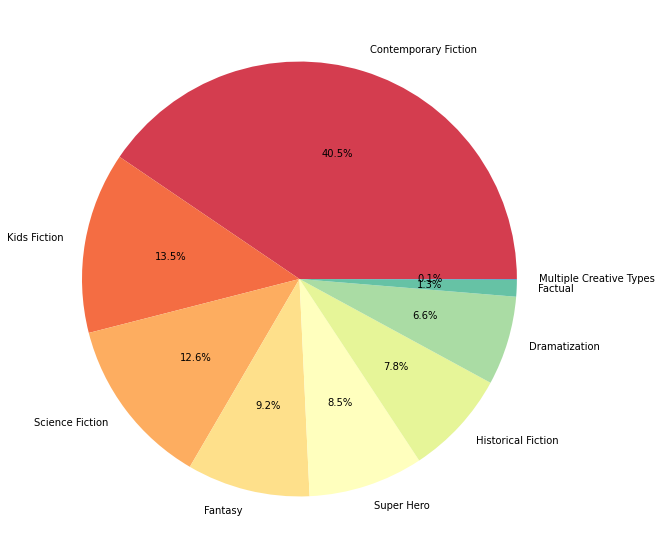

In [840]:
plt.figure(figsize=(10,10))
plt.pie(typesdf['MARKET SHARE'],labels=typesdf['CREATIVE TYPES'],colors=sb.color_palette('Spectral',9),autopct='%1.1f%%')

#Top Distributors

In [841]:
distdf = pd.read_csv('archive\TopDistributors.csv')
distdf.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%


In [842]:
distdf['TOTAL GROSS'] = distdf['TOTAL GROSS'].str.replace(',', '')
distdf['TOTAL GROSS'] = distdf['TOTAL GROSS'].str.replace('$', '')
distdf['AVERAGE GROSS'] = distdf['AVERAGE GROSS'].str.replace(',', '')
distdf['AVERAGE GROSS'] = distdf['AVERAGE GROSS'].str.replace('$', '')
distdf['MARKET SHARE'] = distdf['MARKET SHARE'].str.replace('%', '')
distdf.head()

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,17.02
1,2,Warner Bros.,824,36269425479,44016293,15.25
2,3,Sony Pictures,747,29113002302,38973229,12.24
3,4,Universal,535,28089932569,52504547,11.81
4,5,20th Century Fox,525,25857839756,49253028,10.88


In [843]:
distdf.isnull().sum()

RANK             0
DISTRIBUTORS     0
MOVIES           0
TOTAL GROSS      0
AVERAGE GROSS    0
MARKET SHARE     0
dtype: int64

In [844]:
distdf.dtypes

RANK              int64
DISTRIBUTORS     object
MOVIES            int64
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [845]:
distdf[['MOVIES','TOTAL GROSS','AVERAGE GROSS','MARKET SHARE']] = distdf[['MOVIES','TOTAL GROSS','AVERAGE GROSS','MARKET SHARE']].astype('float')
distdf.dtypes

RANK               int64
DISTRIBUTORS      object
MOVIES           float64
TOTAL GROSS      float64
AVERAGE GROSS    float64
MARKET SHARE     float64
dtype: object

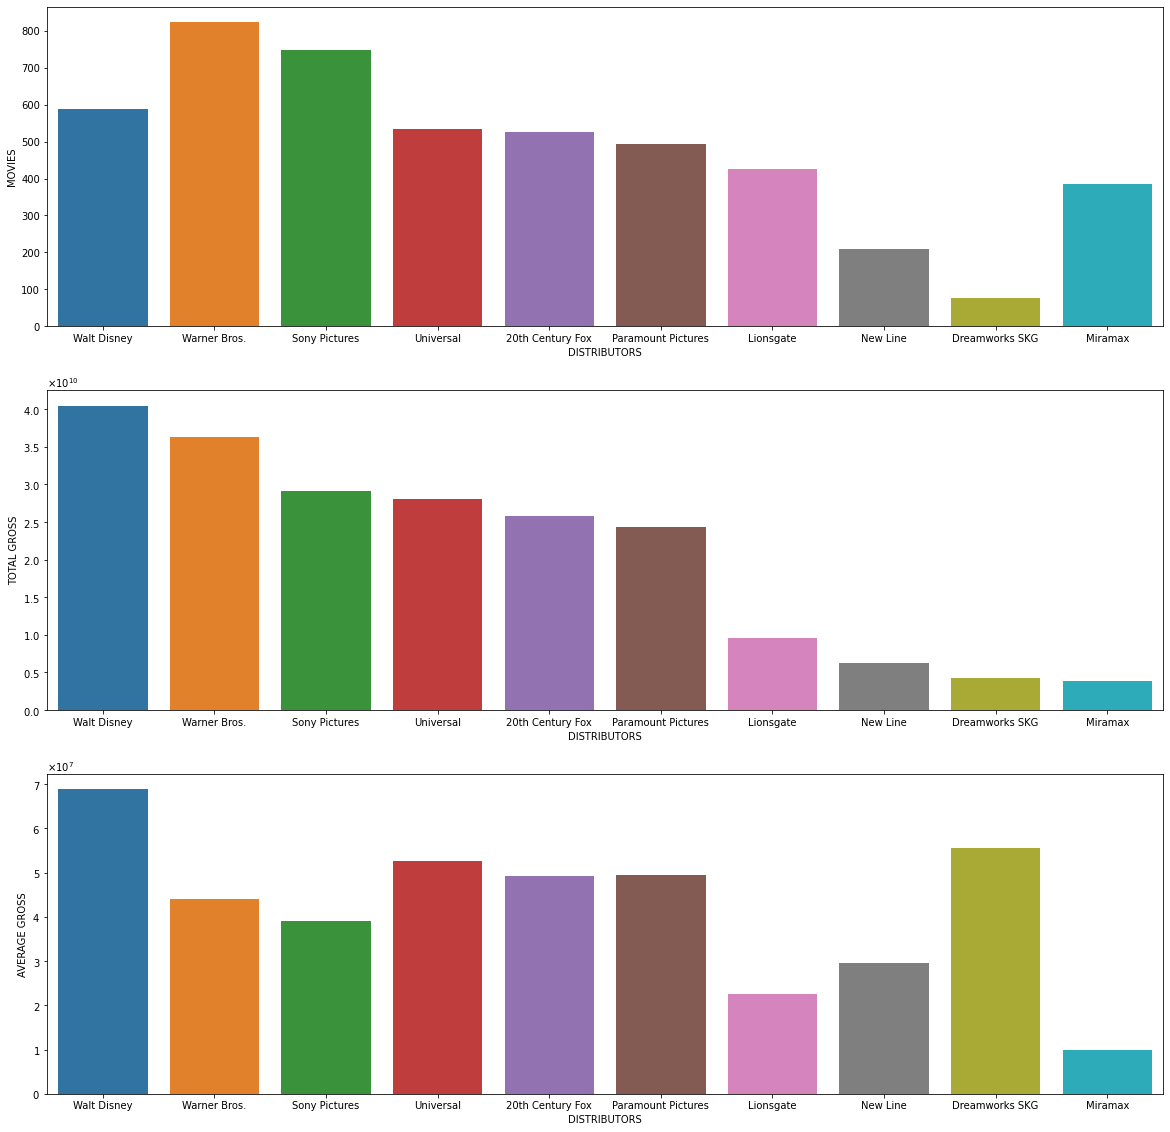

In [846]:
fig,axs = plt.subplots(3,1,figsize=(20,20))
sb.barplot(x='DISTRIBUTORS',y='MOVIES',data=distdf,ax=axs[0])
sb.barplot(x='DISTRIBUTORS',y='TOTAL GROSS',data=distdf,ax=axs[1])
axs[1].ticklabel_format(style='sci',useMathText=True,axis='y')
sb.barplot(x='DISTRIBUTORS',y='AVERAGE GROSS',data=distdf,ax=axs[2])
axs[2].ticklabel_format(style='sci',useMathText=True,axis='y')

In [847]:
print(distdf['MARKET SHARE'].sum())

87.52


In [848]:
values1 = distdf['MARKET SHARE'].copy()
values1 = values1.append(pd.Series([100-87.52]))
labels1 = distdf['DISTRIBUTORS'].copy()
labels1 = labels1.append(pd.Series(['Others']))

([<matplotlib.patches.Wedge at 0x1b99f3fec48>,
 [Text(0.9464642095527984, 0.5605403643232096, 'Walt Disney'),
  Text(0.024533756031080003, 1.0997263727014133, 'Warner Bros.'),
  Text(-0.8200748255700628, 0.7331284201735949, 'Sony Pictures'),
  Text(-1.0996260648934415, -0.028679564274323235, 'Universal'),
  Text(-0.8131288325400524, -0.740824879233987, '20th Century Fox'),
  Text(-0.18401340163906646, -1.0844994550562115, 'Paramount Pictures'),
  Text(0.3052306530595452, -1.0568037889943638, 'Lionsgate'),
  Text(0.5180792695400591, -0.9703575992760808, 'New Line'),
  Text(0.6471228616946546, -0.8895122269379556, 'Dreamworks SKG'),
  Text(0.7385228430758747, -0.8152202219370709, 'Miramax'),
  Text(1.0165318010897348, -0.4203130944584761, 'Others')],
 [Text(0.5162532052106172, 0.3057492896308416, '17.0%'),
  Text(0.013382048744225454, 0.5998507487462253, '15.3%'),
  Text(-0.44731354122003425, 0.3998882291855972, '12.2%'),
  Text(-0.5997960353964226, -0.0156433986950854, '11.8%'),
  Text(

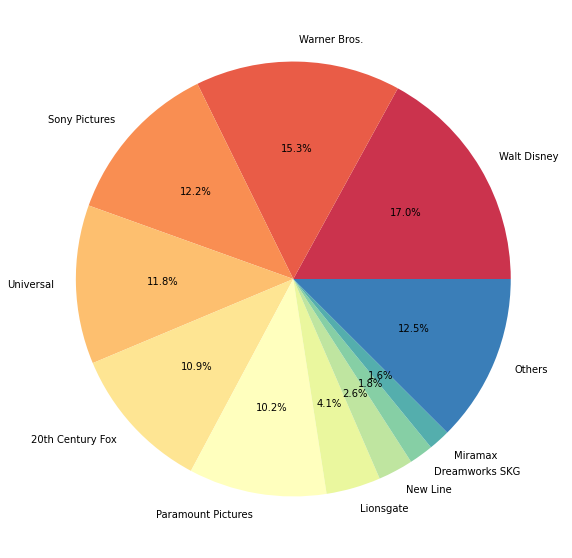

In [849]:
plt.figure(figsize=(10,10))
plt.pie(values1,labels=labels1,colors=sb.color_palette('Spectral',11),autopct='%1.1f%%')

#Top Genres

In [850]:
genredf = pd.read_csv('archive\TopGenres.csv')
genredf.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%


In [851]:
genredf['MOVIES'] = genredf['MOVIES'].str.replace(',', '')
genredf['TOTAL GROSS'] = genredf['TOTAL GROSS'].str.replace(',', '')
genredf['TOTAL GROSS'] = genredf['TOTAL GROSS'].str.replace('$', '')
genredf['AVERAGE GROSS'] = genredf['AVERAGE GROSS'].str.replace(',', '')
genredf['AVERAGE GROSS'] = genredf['AVERAGE GROSS'].str.replace('$', '')
genredf['MARKET SHARE'] = genredf['MARKET SHARE'].str.replace('%', '')
genredf.head()

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,1102,64529536530,58556748,27.14
1,2,Action,1098,49339974493,44936224,20.75
2,3,Drama,5479,35586177269,6495013,14.97
3,4,Comedy,2418,33687992318,13932172,14.17
4,5,Thriller/Suspense,1186,19810201102,16703374,8.33


In [852]:
genredf.isnull().sum()

RANK             0
GENRES           0
MOVIES           0
TOTAL GROSS      0
AVERAGE GROSS    0
MARKET SHARE     0
dtype: int64

In [853]:
genredf.dtypes

RANK              int64
GENRES           object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [854]:
genredf[['MOVIES','TOTAL GROSS','AVERAGE GROSS','MARKET SHARE']] = genredf[['MOVIES','TOTAL GROSS','AVERAGE GROSS','MARKET SHARE']].astype('float')
genredf.dtypes

RANK               int64
GENRES            object
MOVIES           float64
TOTAL GROSS      float64
AVERAGE GROSS    float64
MARKET SHARE     float64
dtype: object

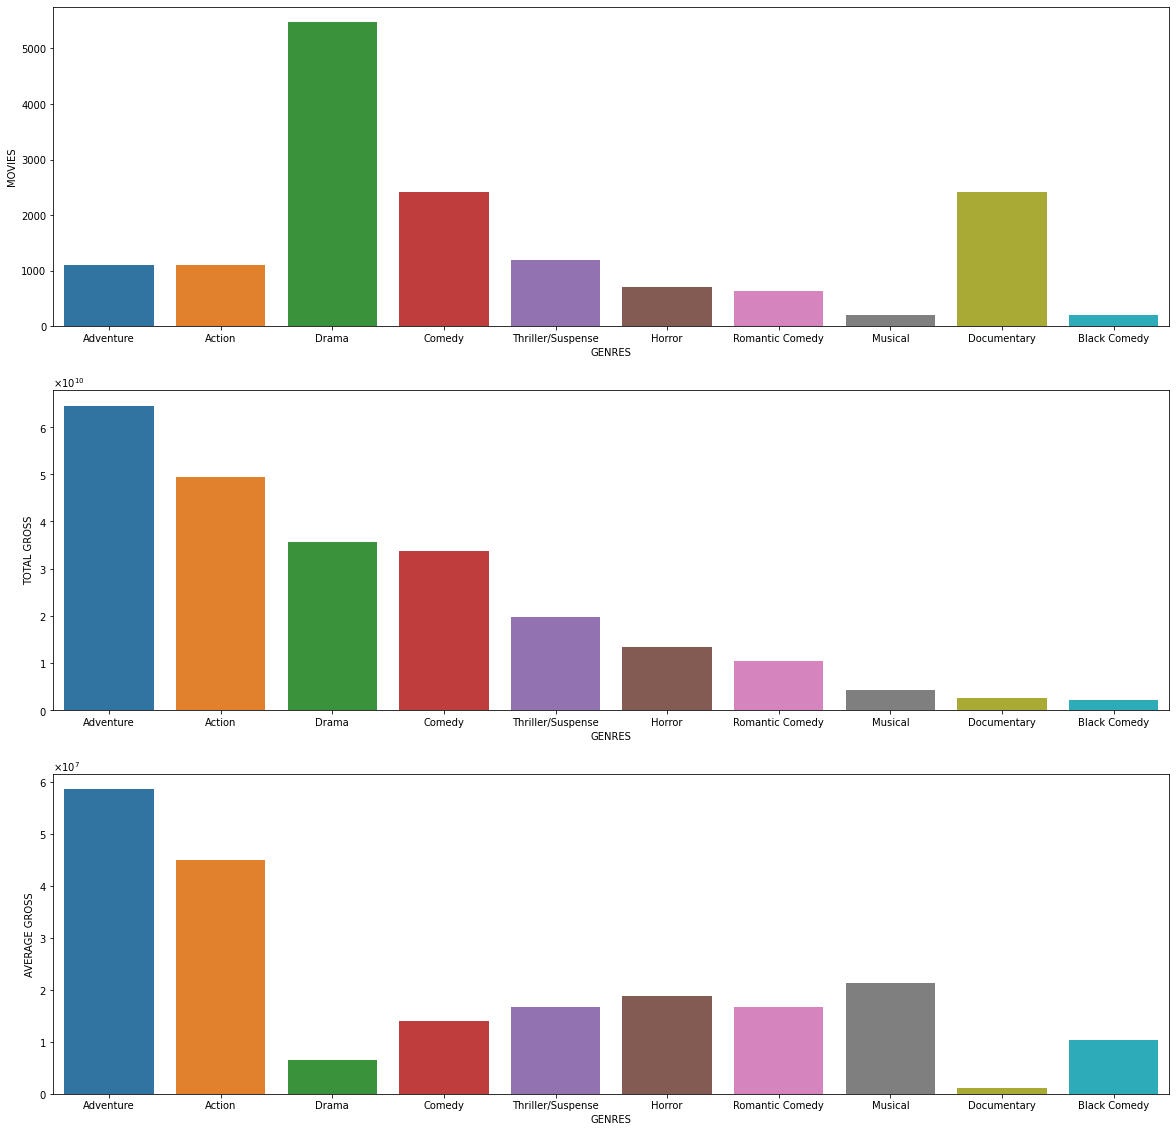

In [855]:
fig,axs = plt.subplots(3,1,figsize=(20,20))
sb.barplot(x='GENRES',y='MOVIES',data=genredf,ax=axs[0])
sb.barplot(x='GENRES',y='TOTAL GROSS',data=genredf,ax=axs[1])
axs[1].ticklabel_format(style='sci',useMathText=True,axis='y')
sb.barplot(x='GENRES',y='AVERAGE GROSS',data=genredf,ax=axs[2])
axs[2].ticklabel_format(style='sci',useMathText=True,axis='y')

([<matplotlib.patches.Wedge at 0x1b992114b48>,
 [Text(0.7181665153171909, 0.8332087711235181, 'Adventure'),
  Text(-0.7929979358514239, 0.7623347517563273, 'Action'),
  Text(-1.0273683983048454, -0.39308291003875634, 'Drama'),
  Text(-0.3067593318708034, -1.0563610709933315, 'Comedy'),
  Text(0.45842553717395296, -0.9999230104696925, 'Thriller/Suspense'),
  Text(0.8425746271597885, -0.707154861163058, 'Horror'),
  Text(1.0216633045313066, -0.40768136108261155, 'Romantic Comedy'),
  Text(1.081689849394506, -0.19986763048800874, 'Musical'),
  Text(1.0953651374405802, -0.1008722740884683, 'Documentary'),
  Text(1.0995332555778405, -0.032040909450188386, 'Black Comedy')],
 [Text(0.3917271901730132, 0.4544775115219189, '27.4%'),
  Text(-0.43254432864623116, 0.41581895550345116, '20.9%'),
  Text(-0.5603827627117337, -0.2144088600211398, '15.1%'),
  Text(-0.1673232719295291, -0.5761969478145444, '14.3%'),
  Text(0.2500502930039743, -0.5454125511652868, '8.4%'),
  Text(0.4595861602689755, -0.3

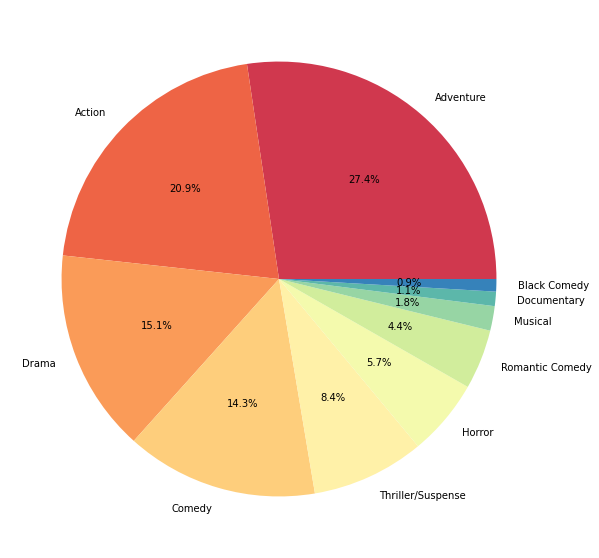

In [856]:
plt.figure(figsize=(10,10))
plt.pie(genredf['MARKET SHARE'],labels=genredf['GENRES'],colors=sb.color_palette('Spectral',10),autopct='%1.1f%%')

#Wide Releases Count

In [857]:
releasedf = pd.read_csv('archive\WideReleasesCount.csv')
releasedf.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [858]:
releasedf.drop(columns=['Unnamed: 9'],inplace=True)

In [859]:
releasedf.isnull().sum()

YEAR                   0
WARNER BROS            0
WALT DISNEY            0
20TH CENTURY FOX       0
PARAMOUNT PICTURES     0
SONY PICTURES          0
UNIVERSAL              0
TOTAL MAJOR 6          0
TOTAL OTHER STUDIOS    0
dtype: int64

In [860]:
releasedf.dtypes

YEAR                   int64
WARNER BROS            int64
WALT DISNEY            int64
20TH CENTURY FOX       int64
PARAMOUNT PICTURES     int64
SONY PICTURES          int64
UNIVERSAL              int64
TOTAL MAJOR 6          int64
TOTAL OTHER STUDIOS    int64
dtype: object

In [862]:
releasedf.describe()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2008.000000,22.777778,15.000000,14.481481,11.703704,18.222222,16.518519,98.703704,33.259259
std,7.937254,6.417125,5.954959,5.286924,3.267731,3.609105,3.320917,19.751952,10.928412
min,1995.000000,5.000000,3.000000,0.000000,3.000000,9.000000,10.000000,34.000000,19.000000
25%,2001.500000,18.000000,11.000000,12.500000,10.000000,16.000000,13.500000,89.000000,24.000000
50%,2008.000000,22.000000,13.000000,15.000000,12.000000,18.000000,17.000000,104.000000,30.000000
75%,2014.500000,27.500000,20.500000,17.500000,14.000000,20.500000,19.500000,112.000000,42.000000
max,2021.000000,32.000000,25.000000,25.000000,16.000000,26.000000,22.000000,128.000000,58.000000


Text(0, 0.5, 'Releases')

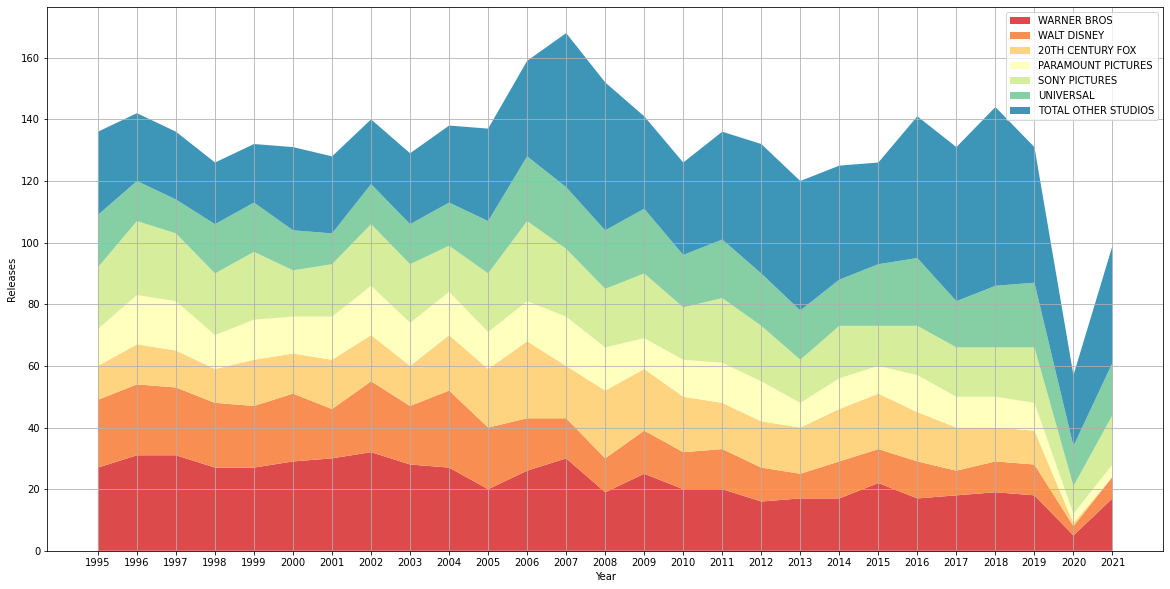

In [861]:
plt.figure(figsize=(20,10))
plt.stackplot(releasedf['YEAR'],releasedf['WARNER BROS'],releasedf['WALT DISNEY'],releasedf['20TH CENTURY FOX'],releasedf['PARAMOUNT PICTURES'],releasedf['SONY PICTURES'],releasedf['UNIVERSAL'],releasedf['TOTAL OTHER STUDIOS'],labels=['WARNER BROS','WALT DISNEY','20TH CENTURY FOX','PARAMOUNT PICTURES','SONY PICTURES','UNIVERSAL','TOTAL OTHER STUDIOS'],colors=sb.color_palette('Spectral',7))
plt.legend()
plt.xticks(np.arange(1995, 2022, 1))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Releases")